(Exercise1Solutions)=
# Exercise 1 Solutions

{numref}`Exercise1` {ref}`Exercise1`

In [1]:
#4.4.1 Exercise 1
#A mass of 0.1 kg of helium (He,  𝑀He = 4  kg/kmol) at 500 kPa is contained within 
#a 0.4 m3 rigid tank. The tank is heated until the pressure is 700 kPa. 
#Calculate the temperature change of helium (in K) as a result of this heating.

m=0.1 #kg
R_bar = 8.314 # kJ/kg/K
M = 4 #kg/kmol
V = 0.4 #m3
P1 = 500 #kPa
P2 = 700 #kPa

def T(P):
    return P*V/m/(R_bar/M)

print("The temperature change as a result of heating is ", round(T(P2)-T(P1),2), " K")

The temperature change as a result of heating is  384.89  K


In [2]:
#4.4.1 Exercise 2

#given: 3 kg of nitrogen (N2) at 35°C and 150 kPa

# 2a: specific volume calc
#change temp to Kelvin 
T=35+273.15
P=150
M=28
def v_ideal(T,P,M):
    return 8.314*T/(M*P)
print("2a: Specific volume:" + str(v_ideal(T,P,M))+" m^3/kg")

2a: Specific volume:0.6099902619047619 m^3/kg


In [3]:
#4.4.1 Exercise 2

#given: 3 kg of nitrogen (N2) at 35°C and 150 kPa

# 2b: absolute volume calc
#change temp to Kelvin 
T=35+273.15
P=150
M=28
m=3 # kg
def v_ideal(T,P,M):
    return 8.314*T/(M*P)

absv=3*v_ideal(T,P,M)
print("2b: Absolute volume:" + str(absv)+" m^3")

2b: Absolute volume:1.8299707857142857 m^3


2c


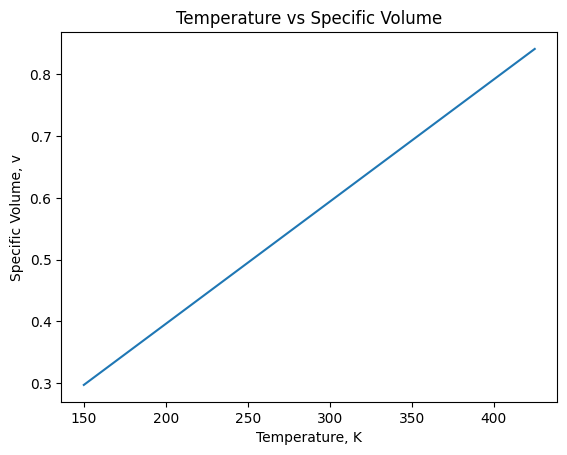

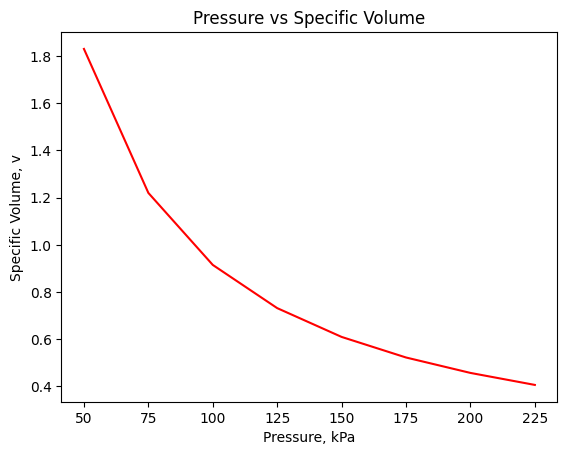

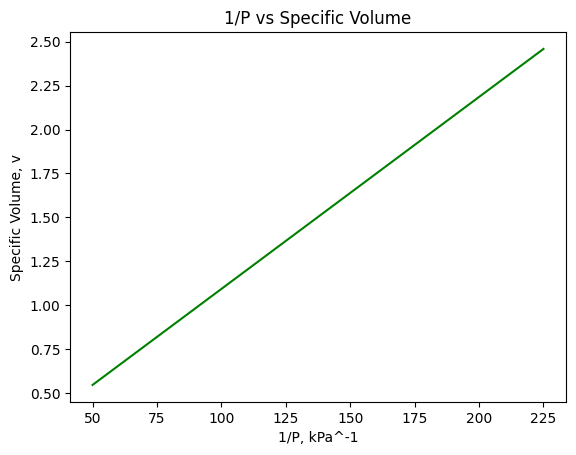

In [4]:
#4.4.1 Exercise 2
# 2c: Does the specific volume of the nitrogen change with temperature or pressure?
# The Ideal Gas EOS tells us the specific volume of the nitrogen changes with temperature/pressure, as it's 
# inversely proportional to pressure and proportional to temperature. We can verify this by creating a plot  
# of specific volume versus temperature, and versus pressure, using an array of values for T and P 
#holding pressure constant, changing the temperature by creating an array from 150 to 450 using increments of 25
def v_ideal(T,P,M):
    return 8.314*T/(M*P)
print("2c")
import matplotlib.pyplot as plt
import numpy as np 
temps=np.arange(150,450,25)
xvals = temps
yvals = v_ideal(temps,P,M)
plt.plot(xvals,yvals)
plt.xlabel('Temperature, K')
plt.ylabel('Specific Volume, v')
plt.title("Temperature vs Specific Volume")
plt.show()
#holding temperature constant, changing the pressure by creating an array from 50 to 250 using increments of 25
pressures=np.arange(50,250,25)
xvals = pressures
yvals = v_ideal(T,pressures,M)
plt.plot(xvals,yvals,color="red")
plt.xlabel('Pressure, kPa')
plt.ylabel('Specific Volume, v')
plt.title("Pressure vs Specific Volume")
plt.show()
#Since pressure and volume are inversely proportional, we can get a linear representation of the data by doing 1/P vs v
plt.plot(xvals,1/yvals,color="green")
plt.xlabel('1/P, kPa^-1')
plt.ylabel('Specific Volume, v')
plt.title("1/P vs Specific Volume")
plt.show()

2d


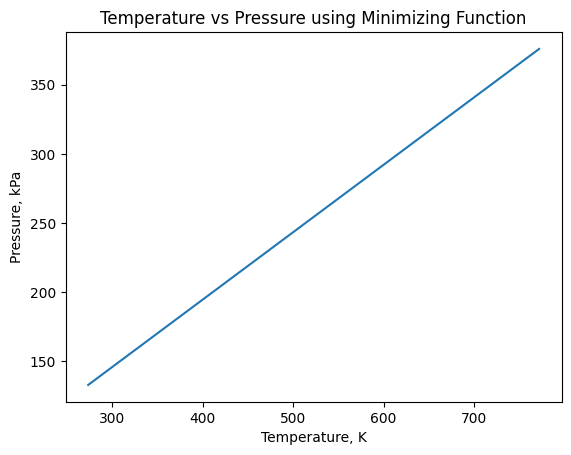

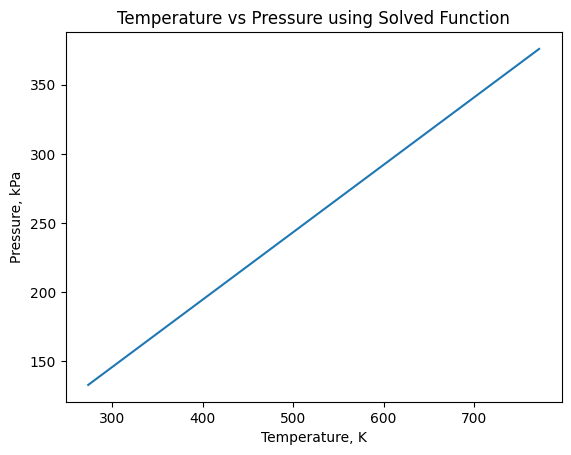

In [5]:
#4.4.1 Exercise 2
#2d: Plot the pressure as a function of temperature between 0°C and 500°C with and without using a minimizing function
#Using a minimizing function 
print("2d")
import matplotlib.pyplot as plt
import numpy as np 

def v_ideal(T,P,M):
    return 8.314*T/(M*P)
temps=np.arange(273.15,773.15,1) 
v=absv/3
def R(M):
        return 8.314/M
def idealEOS(t):
    return abs(t[0]*t[1]-R(t[3])*t[2]) 
def con1(t):
    return P-t[0]
def con2(t):
    return v-t[1]
def con3(t):
    return T-t[2]
def con4(t):
    return M-t[3]
from scipy.optimize import minimize 
t = [10000,v,T,M] 
cons = ({'type':'eq', 'fun': con2},{'type':'eq', 'fun': con3},{'type':'eq', 'fun': con4}) 
pres=[] 
for i in temps: 
    T,v,M = i,v,28
    t = [10000,v,i,M] 
    res=minimize(idealEOS,t,constraints=cons)
    pres.append(res.x[0])
xvals = temps
yvals = pres
plt.plot(xvals,yvals)
plt.xlabel('Temperature, K')
plt.ylabel('Pressure, kPa')
plt.title("Temperature vs Pressure using Minimizing Function")
plt.show()
#Without a minimizing function 
def P_ideal(T,v,M):
    return 8.314*T/M/v
v=absv/3
temps=np.arange(273.15,773.15,1)
xvals = temps
yvals = P_ideal(temps,v,M)
plt.plot(xvals,yvals)
plt.xlabel('Temperature, K')
plt.ylabel('Pressure, kPa')
plt.title("Temperature vs Pressure using Solved Function")
plt.show()


In [6]:
#4.4.1 Exercise 2

#2e: Now imagine it is connected to a second tank through a valve with volume 1m3 also containing N2 at 10°C and 450 kPa. 
#The valve is opened, and the entire system is allowed to reach thermal equilibrium with the surroundings, which are at 25°C.
#Determine the final equilibrium pressure of N2.
#Given data: m1=3kg, T1=35°C, P1=150kPa, V2=1m^3, P2=450kPa, T2=10°C, surroundingT=25°C, Find: final equilibrium pressure
#From 2b: V1=1.83 m^3
#Using values for tank 2, find initial mass of nitrogen w/in tank 2 by rearranging PV=(m/M)RT for m 
print("2e")
def m_ideal(P,T,M,V):
    return P*V*M/8.314/T
m2=m_ideal(450,283.15,28,1)
#Now that we have our m2 value, we can find our equilibrium mass by adding m1 and m2
m1=3
meq=m1+m2
#using V from part 2b, we can find our equilibrium volume by adding v1 and v2
v2=1
Veq=absv+v2
#convert equilibrium temp to kelvin
Teq=25+273.15
M=28
#Now we have meq,Teq,veq,and M, which we can use to find Peq using the ideal gas EOS rearranged for pressure 
def P_ideal(T,v,M):
    return 8.314*T/M/v
print("The final equilibrium pressure is: " + str(P_ideal(Teq,Veq/meq,M)) +" kPa")


2e
The final equilibrium pressure is: 261.284222107384 kPa


In [7]:
#4.4.1 Exercise 3

#A frictionless piston–cylinder contain 5 kg of nitrogen at 100 kPa and 250 K. 
#The system is compressed until it reaches a final temperature of 450 K. 
#Assume the compression occurs according to to the relation  𝑝𝑉^2 = constant.

In [8]:
#4.4.1 Exercise 3
#a) Calculate the volume and pressure after compression.

m=5 #kg
R_bar = 8.314 # kJ/kg/K
M = 28 #kg/kmol
T1 = 250 #K
T2=450 #K
P1 = 100 #kPa

def P_ideal(V,T):
    return m*(R_bar/M)*T/V

def const(P1,T1):
    return P1*(m*(R_bar/M)*T1/P1)**2 #P*V**2=const

def P_exp(V):
    return (const(P1,T1)/(V**2))
            
def func(V):
    return P_ideal(V,T2)-P_exp(V)

from scipy.optimize import fsolve
root = fsolve(func, 1)

print("The volume after compression is", round(root[0],2), "m^3")
print("The pressure after compression is", round(P_exp(root[0]),3), "kPa")


The volume after compression is 2.06 m^3
The pressure after compression is 324.0 kPa
